                                Date         Open         High          Low  \
count                           1644  1644.000000  1644.000000  1644.000000   
mean   2015-08-25 16:40:17.518248192    98.181886    99.201350    97.088254   
min              2012-05-18 00:00:00    18.080000    18.270000    17.549999   
25%              2014-01-07 18:00:00    56.042501    57.552501    55.102500   
50%              2015-08-25 12:00:00    92.920002    94.294998    91.860001   
75%              2017-04-12 06:00:00   140.850002   141.605003   139.742504   
max              2018-11-28 00:00:00   215.720001   218.619995   214.270004   
std                              NaN    52.852539    53.236325    52.453441   

             Close    Adj Close        Volume  
count  1644.000000  1644.000000  1.644000e+03  
mean     98.188570    98.188570  3.609972e+07  
min      17.730000    17.730000  5.913100e+06  
25%      56.082499    56.082499  1.812308e+07  
50%      93.099998    93.099998  2.644320e+07  


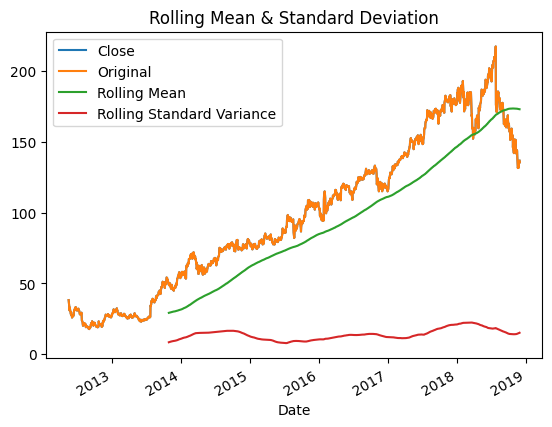

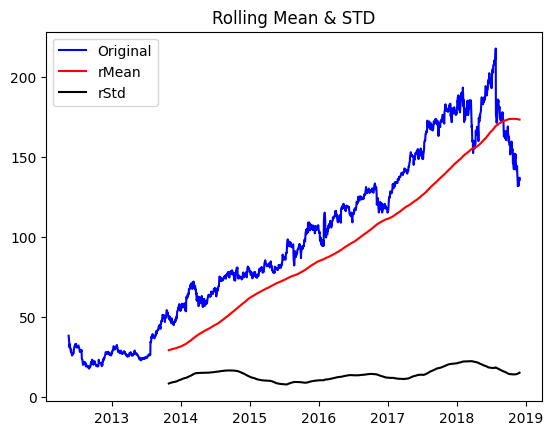

results of dikey-fuller test:
Test Statistic            -1.043445
p-value                    0.737091
#lags Used                 0.000000
#observations           1643.000000
Critical value (1%)       -3.434336
Critical value (5%)       -2.863301
Critical value (10%)      -2.567707
dtype: float64


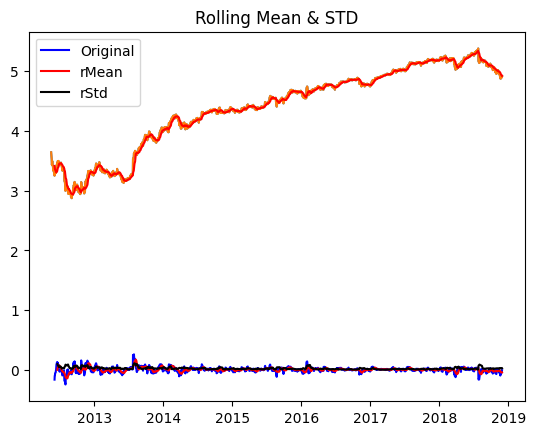

results of dikey-fuller test:
Test Statistic         -8.344173e+00
p-value                 3.117673e-13
#lags Used              1.100000e+01
#observations           1.621000e+03
Critical value (1%)    -3.434391e+00
Critical value (5%)    -2.863325e+00
Critical value (10%)   -2.567720e+00
dtype: float64


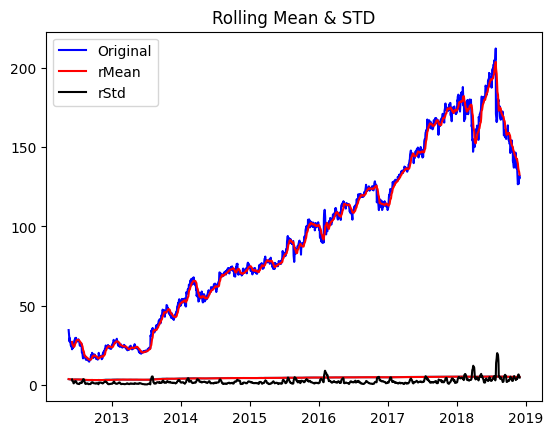

results of dikey-fuller test:
Test Statistic            -1.051284
p-value                    0.734103
#lags Used                 0.000000
#observations           1643.000000
Critical value (1%)       -3.434336
Critical value (5%)       -2.863301
Critical value (10%)      -2.567707
dtype: float64


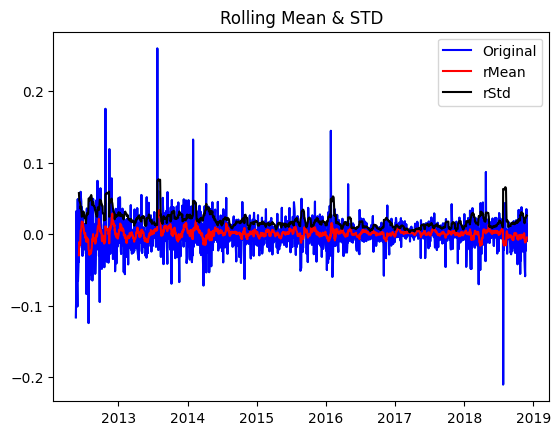

results of dikey-fuller test:
Test Statistic           -40.271133
p-value                    0.000000
#lags Used                 0.000000
#observations           1642.000000
Critical value (1%)       -3.434339
Critical value (5%)       -2.863302
Critical value (10%)      -2.567708
dtype: float64


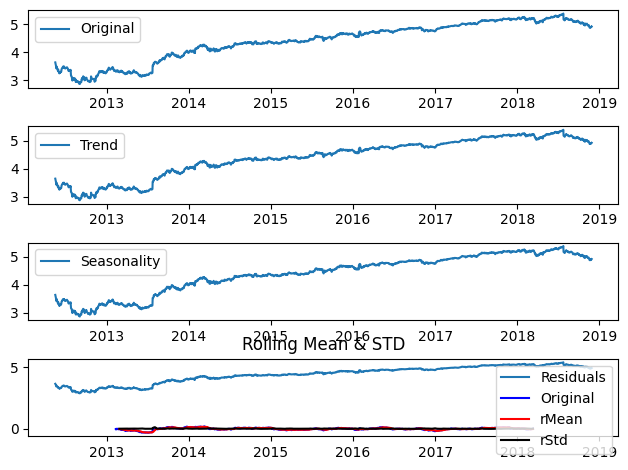

results of dikey-fuller test:
Test Statistic            -3.359407
p-value                    0.012423
#lags Used                 0.000000
#observations           1279.000000
Critical value (1%)       -3.435473
Critical value (5%)       -2.863802
Critical value (10%)      -2.567975
dtype: float64


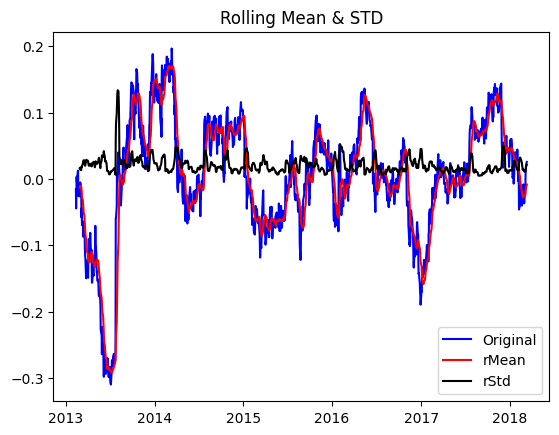

results of dikey-fuller test:
Test Statistic            -3.359407
p-value                    0.012423
#lags Used                 0.000000
#observations           1279.000000
Critical value (1%)       -3.435473
Critical value (5%)       -2.863802
Critical value (10%)      -2.567975
dtype: float64
Plotting AR Model
Date
2012-05-18    0.000000
2012-05-21    3.643621
2012-05-22    3.525524
2012-05-23    3.432623
2012-05-24    3.466215
dtype: float64
Date
2012-05-18       0.000000
2012-05-21       3.643621
2012-05-22       7.169145
2012-05-23      10.601768
2012-05-24      14.067983
                 ...     
2018-11-21    7204.238544
2018-11-23    7209.142748
2018-11-26    7214.023158
2018-11-27    7218.939118
2018-11-28    7223.844239
Length: 1644, dtype: float64


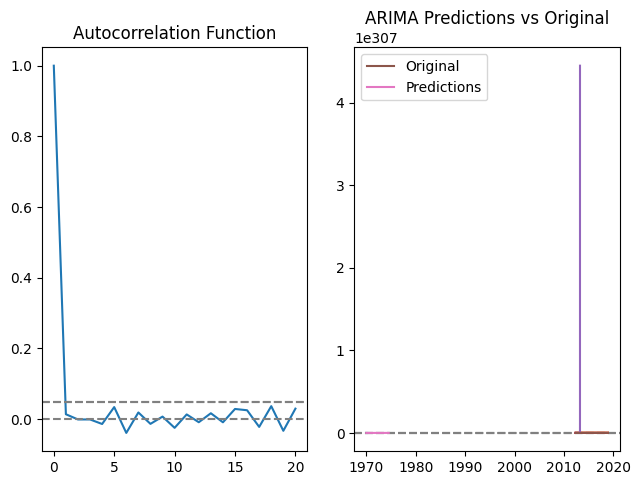

In [7]:



import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt





from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf

from sklearn.metrics import mean_squared_error

get_ipython().run_line_magic('matplotlib', 'inline')




df = pd.read_csv('/FB.csv', parse_dates=['Date'])
df.head(3)





print (df.describe())
print ("=============================================================")
print (df.dtypes)





df1 = df[['Date','Close']]
df1.head(3)




# Setting the Date as Index
df_ts = df1.set_index('Date')
df_ts.sort_index(inplace=True)
print (type(df_ts))
print (df_ts.head(3))
print ("========================")
print (df_ts.tail(3))





df_ts[df_ts.isnull()]





len(df_ts[df_ts.isnull()])




df_ts = df_ts.sort_index()
df_ts.index





df_ts.Close.fillna(method='pad', inplace=True)





df_ts[df_ts.Close.isnull()]
len(df_ts[df_ts.Close.isnull()])




df_ts.plot()




# Dickey Fuller Test Function
def test_stationarity(timeseries):
    # Perform Dickey-Fuller test:
    from statsmodels.tsa.stattools import adfuller
    print('Results of Dickey-Fuller Test:')
    print ("==============================================")

    dftest = adfuller(timeseries, autolag='AIC')

    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags Used', 'Number of Observations Used'])

    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value

    print(dfoutput)




# Stationarity Check - Lets do a quick check on Stationarity with Dickey Fuller Test
# Convert the DF to series first
ts = df_ts['Close']
test_stationarity(ts)




rolmean = ts.rolling(window=365).mean()
rolvar = ts.rolling(window=365).std()

plt.plot(ts, label='Original')
plt.plot(rolmean, label='Rolling Mean')
plt.plot(rolvar, label='Rolling Standard Variance')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)




orig=plt.plot(ts, color='blue', label='Original')
mean=plt.plot(rolmean, color='red', label='rMean')
std=plt.plot(rolvar, color='black', label='rStd')
plt.legend(loc='best')
plt.title('Rolling Mean & STD')
plt.show(block=False)



ts.dropna(inplace=True)
ts.head(5)
from statsmodels.tsa.stattools import adfuller





print('results of dikey-fuller test:')
dftest=adfuller(ts, autolag='AIC')





dfoutput=pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags Used', '#observations'])
for key,value in dftest[4].items():
    dfoutput['Critical value (%s)'%key]=value

print (dfoutput)





ts_logScale=np.log(ts)
plt.plot(ts_logScale)




movingAverage=ts_logScale.rolling(window=12).mean()
movingSTD=ts_logScale.rolling(window=12).std()
plt.plot(ts_logScale)
plt.plot(movingAverage, color='red')





ts_LogScaleMinusMA=ts_logScale-movingAverage
ts_LogScaleMinusMA.head(12)
ts_LogScaleMinusMA.dropna(inplace=True)
ts_LogScaleMinusMA.head(10)





from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    movingAverage=timeseries.rolling(window=12).mean()
    movingSTD=timeseries.rolling(window=12).std()
    orig=plt.plot(timeseries, color='blue', label='Original')
    mean=plt.plot(movingAverage, color='red', label='rMean')
    std=plt.plot(movingSTD, color='black', label='rStd')
    plt.legend(loc='best')
    plt.title('Rolling Mean & STD')
    plt.show(block=False)
    print('results of dikey-fuller test:')
    dftest=adfuller(timeseries, autolag='AIC')
    dfoutput=pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags Used', '#observations'])
    for key,value in dftest[4].items():
        dfoutput['Critical value (%s)'%key]=value

    print (dfoutput)





test_stationarity(ts_LogScaleMinusMA)





exponentialDecayWeightedAverage=ts_logScale.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(ts_logScale)
plt.plot(exponentialDecayWeightedAverage, color='red')





ts_LogScaleMinusExponentialDecayAverage= ts-exponentialDecayWeightedAverage
test_stationarity(ts_LogScaleMinusExponentialDecayAverage)





ts_LogDiffShifting= ts_logScale-ts_logScale.shift()
plt.plot(ts_LogDiffShifting)




ts_LogDiffShifting.dropna(inplace=True)
test_stationarity(ts_LogDiffShifting)





ts_logScale.head()





from statsmodels.tsa.seasonal import seasonal_decompose
ts_logScale.dropna(inplace=True)
decomposition = seasonal_decompose(ts_logScale, period=365)
trend =decomposition.trend
seasonal=decomposition.seasonal
residual=decomposition.resid




plt.subplot(411)
plt.plot(ts_logScale, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(ts_logScale, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(ts_logScale, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(ts_logScale, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
decomposedLogData=residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)





decomposedLogData=residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)




from statsmodels.tsa.stattools import acf, pacf

lag_acf=acf(ts_LogDiffShifting, nlags=20)
lag_pacf=pacf(ts_LogDiffShifting, nlags=20, method='ols')





plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_LogDiffShifting)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_LogDiffShifting)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_LogDiffShifting)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_LogDiffShifting)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()





from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(ts_logScale, order=(1,1,1))
results_AR = model.fit()
plt.plot(ts_LogDiffShifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_LogDiffShifting)**2))
print('Plotting AR Model')




model=ARIMA(ts_logScale, order=(1,1,1))
results_ARIMA = model.fit()
plt.plot(ts_LogDiffShifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_LogDiffShifting)**2))





predicitons_ARIMA_diff=pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predicitons_ARIMA_diff.head())





predicitons_ARIMA_diff_cumsum=predicitons_ARIMA_diff.cumsum()
print(predicitons_ARIMA_diff_cumsum)




predictions_ARIMA_log=pd.Series(ts_logScale.iloc[0], index=ts_logScale.index)
predictions_ARIMA_log=predictions_ARIMA_log.add(predicitons_ARIMA_diff_cumsum, fill_value=0)





predictions_ARIMA_log.head()





predicitons_ARIMA=np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predicitons_ARIMA)





ts_logScale





# Generate predictions
predictions = results_ARIMA.predict(start=1, end=len(ts_logScale) + 13)

# Plot the results
plt.plot(ts_logScale, label='Original')
plt.plot(predictions, label='Predictions')
plt.title('ARIMA Predictions vs Original')
plt.legend()
plt.show()



results_ARIMA.forecast(14)








# In[ ]:

!pip install statsmodels